Linear interpolation
x(1982) = 14.2205
x(1984) = 14.1376
x(1986) = 14.1519
x(1988) = 14.2333
x(1990) = 14.2512
x(1992) = 14.2454
x(1994) = 14.2715
x(1996) = 14.3882
x(1998) = 14.3812


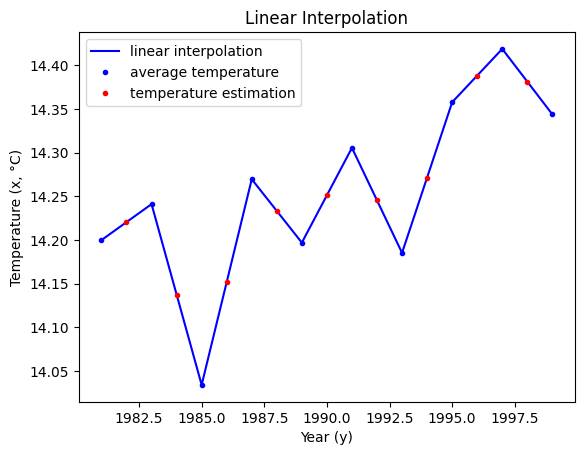

Quadratic interpolation
x(1982) = 14.2694
x(1984) = 14.1149
x(1986) = 14.1426
x(1988) = 14.245
x(1990) = 14.2537
x(1992) = 14.2427
x(1994) = 14.2533
x(1996) = 14.4092
x(1998) = 14.3969


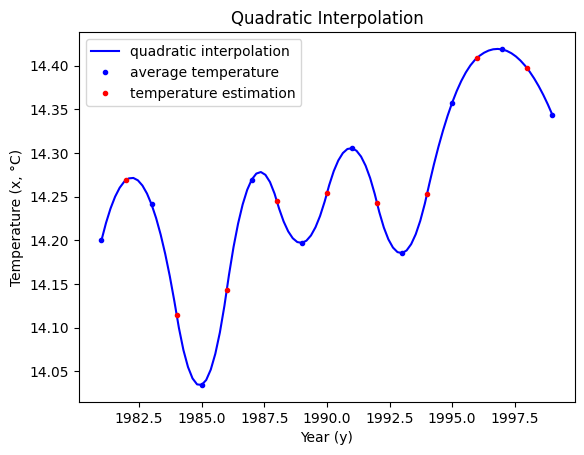

Cubic interpolation
x(1982) = 14.3258
x(1984) = 14.0944
x(1986) = 14.1469
x(1988) = 14.2461
x(1990) = 14.2526
x(1992) = 14.245
x(1994) = 14.2477
x(1996) = 14.4157
x(1998) = 14.3877


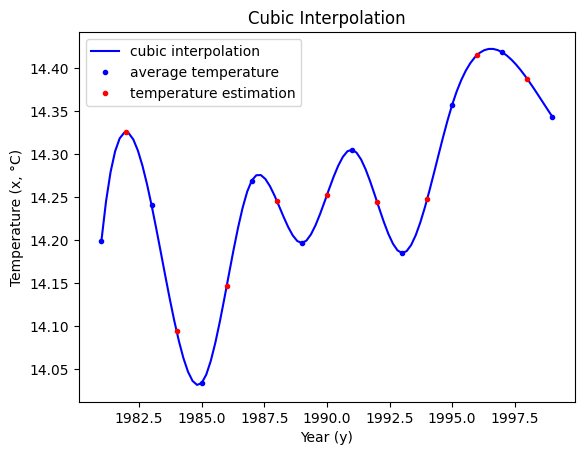

In [1]:
# a.
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.interpolate import CubicSpline

y = [1981, 1983, 1985, 1987, 1989, 1991, 1993, 1995, 1997, 1999]
x = [14.1999, 14.2411, 14.0342, 14.2696, 14.197, 14.3055, 14.1853, 14.3577, 14.4187, 14.3438]

y_even = [1982, 1984, 1986, 1988, 1990, 1992, 1994, 1996, 1998]
x_est = [0] * len(y_even)

# Linear interpolation
print('Linear interpolation')

f = interp1d(y, x, kind='linear')

for i in range(len(y_even)):
    x_est[i] = np.round(f(y_even[i]), 4)
    print(f'x({y_even[i]}) = {x_est[i]}')

plt.plot(y, x, '-b', label='linear interpolation')
plt.plot(y, x, 'b.', label='average temperature')
plt.plot(y_even, x_est, 'r.', label='temperature estimation')
plt.title('Linear Interpolation')
plt.ylabel(f'Temperature (x, {chr(176)}C)')
plt.xlabel('Year (y)')
plt.legend()
plt.show()

# Quadratic interpolation
print('Quadratic interpolation')

f = interp1d(y, x, kind='quadratic')

for i in range(len(y_even)):
    x_est[i] = np.round(f(y_even[i]), 4)
    print(f'x({y_even[i]}) = {x_est[i]}')

y_quad = np.linspace(y[0], y[len(y) - 1], 100)
x_quad = f(y_quad)

plt.plot(y_quad, x_quad, '-b', label='quadratic interpolation')
plt.plot(y, x, 'b.', label='average temperature')
plt.plot(y_even, x_est, 'r.', label='temperature estimation')
plt.title('Quadratic Interpolation')
plt.ylabel(f'Temperature (x, {chr(176)}C)')
plt.xlabel('Year (y)')
plt.legend()
plt.show()

# Cubic interpolation
print('Cubic interpolation')

f = CubicSpline(y, x)

for i in range(len(y_even)):
    x_est[i] = np.round(f(y_even[i]), 4)
    print(f'x({y_even[i]}) = {x_est[i]}')

y_cubic = np.linspace(y[0], y[len(y) - 1], 100)
x_cubic = f(y_cubic)

plt.plot(y_cubic, x_cubic, '-b', label='cubic interpolation')
plt.plot(y, x, 'b.', label='average temperature')
plt.plot(y_even, x_est, 'r.', label='temperature estimation')
plt.title('Cubic Interpolation')
plt.ylabel(f'Temperature (x, {chr(176)}C)')
plt.xlabel('Year (y)')
plt.legend()
plt.show()

x(1982) = [14.158]
x(1984) = [14.1823]
x(1986) = [14.2067]
x(1988) = [14.231]
x(1990) = [14.2553]
x(1992) = [14.2796]
x(1994) = [14.3039]
x(1996) = [14.3282]
x(1998) = [14.3525]


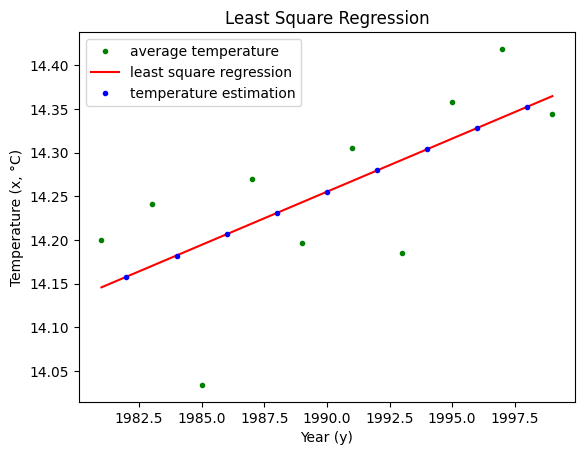

In [2]:
# b.

y = np.array([1981, 1983, 1985, 1987, 1989, 1991, 1993, 1995, 1997, 1999])
x = np.array([14.1999, 14.2411, 14.0342, 14.2696, 14.197, 14.3055, 14.1853, 14.3577, 14.4187, 14.3438])

A = np.vstack((y, np.ones(len(y)))).T
x = x[:, np.newaxis]

alpha = np.dot(np.dot(np.linalg.inv(np.dot(A.T, A)), A.T), x)

def f(y):
    return ((alpha[0] * y) + alpha[1])

for i in range(len(y_even)):
    x_est[i] = np.round(f(y_even[i]), 4)
    print(f'x({y_even[i]}) = {x_est[i]}')

plt.plot(y, x, 'g.', label='average temperature')
plt.plot(y, f(y), 'r', label='least square regression')
plt.plot(y_even, x_est, 'b.', label='temperature estimation')
plt.title('Least Square Regression')
plt.ylabel(f'Temperature (x, {chr(176)}C)')
plt.xlabel('Year (y)')
plt.legend()
plt.show()

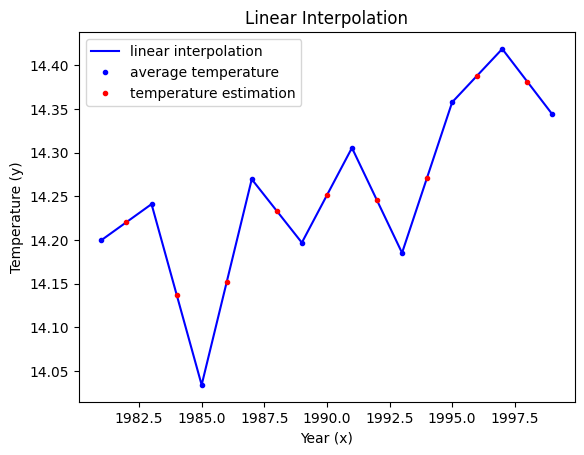

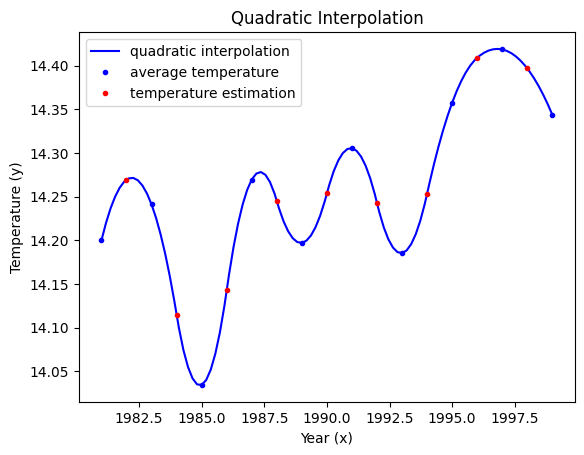

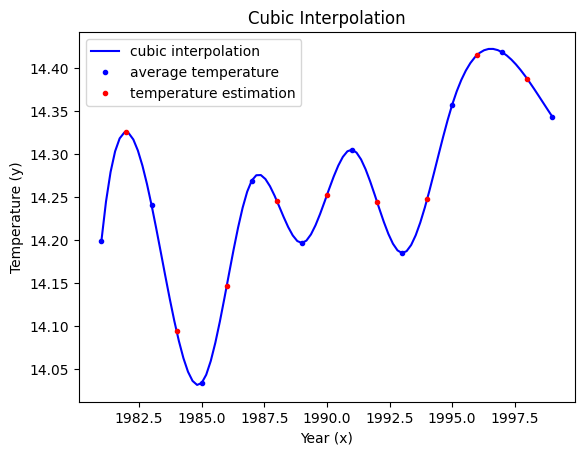

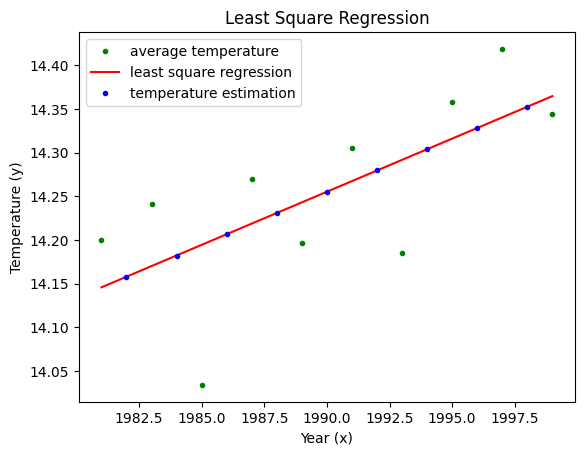

In [3]:
# d.

x = [1981, 1983, 1985, 1987, 1989, 1991, 1993, 1995, 1997, 1999]
y = [14.1999, 14.2411, 14.0342, 14.2696, 14.197, 14.3055, 14.1853, 14.3577, 14.4187, 14.3438]

x_even = [1982, 1984, 1986, 1988, 1990, 1992, 1994, 1996, 1998]
y_est = [0] * len(x_even)

# Linear interpolation

f = interp1d(x, y, kind='linear')

for i in range(len(x_even)):
    y_est[i] = np.round(f(x_even[i]), 4)

plt.plot(x, y, '-b', label='linear interpolation')
plt.plot(x, y, 'b.', label='average temperature')
plt.plot(x_even, y_est, 'r.', label='temperature estimation')
plt.title('Linear Interpolation')
plt.ylabel('Temperature (y)')
plt.xlabel('Year (x)')
plt.legend()
plt.show()

# Quadratic interpolation

f = interp1d(x, y, kind='quadratic')

for i in range(len(x_even)):
    y_est[i] = np.round(f(x_even[i]), 4)

x_quad = np.linspace(x[0], x[len(x) - 1], 100)
y_quad = f(x_quad)

plt.plot(x_quad, y_quad, '-b', label='quadratic interpolation')
plt.plot(x, y, 'b.', label='average temperature')
plt.plot(x_even, y_est, 'r.', label='temperature estimation')
plt.title('Quadratic Interpolation')
plt.ylabel('Temperature (y)')
plt.xlabel('Year (x)')
plt.legend()
plt.show()

# Cubic interpolation

f = CubicSpline(x, y)

for i in range(len(y_even)):
    y_est[i] = np.round(f(x_even[i]), 4)

x_cubic = np.linspace(x[0], x[len(y) - 1], 100)
y_cubic = f(x_cubic)

plt.plot(x_cubic, y_cubic, '-b', label='cubic interpolation')
plt.plot(x, y, 'b.', label='average temperature')
plt.plot(x_even, y_est, 'r.', label='temperature estimation')
plt.title('Cubic Interpolation')
plt.ylabel('Temperature (y)')
plt.xlabel('Year (x)')
plt.legend()
plt.show()

# Least square regression

x = np.array([1981, 1983, 1985, 1987, 1989, 1991, 1993, 1995, 1997, 1999])
y = np.array([14.1999, 14.2411, 14.0342, 14.2696, 14.197, 14.3055, 14.1853, 14.3577, 14.4187, 14.3438])

A = np.vstack((x, np.ones(len(x)))).T
y = y[:, np.newaxis]

alpha = np.dot(np.dot(np.linalg.inv(np.dot(A.T, A)), A.T), y)

def f(x):
    return ((alpha[0] * x) + alpha[1])

for i in range(len(x_even)):
    y_est[i] = np.round(f(x_even[i]), 4)

plt.plot(x, y, 'g.', label='average temperature')
plt.plot(x, f(x), 'r', label='least square regression')
plt.plot(x_even, y_est, 'b.', label='temperature estimation')
plt.title('Least Square Regression')
plt.ylabel('Temperature (y)')
plt.xlabel('Year (x)')
plt.legend()
plt.show()